<a href="https://colab.research.google.com/github/NakkaAnkarao8/cancer-detection/blob/main/Benign_and_malignant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/data/Dataset2.zip')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import cv2
import tensorflow as tf
import sklearn
import skimage
from skimage.transform import resize
import random
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [ ]:
!pip install keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from glob import glob

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from keras.utils import to_categorical

In [ ]:
train_data = '/tmp/Dataset2/FNA'

In [ ]:
test_data = '/tmp/Dataset2/test'

In [ ]:
LOAD_FROM_IMAGES = True

def get_data(folder):
    x = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith("."):
            if folderName in ["benign"]:
                label = 0
            elif folderName in ["malignant"]:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder +"/" +folderName+"/")):
                img_file = cv2.imread(folder + "/" +folderName + "/" + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file,(224,224,3), mode = "constant",anti_aliasing=True)
                    img_arr = np.asarray(img_file)
                    x.append(img_arr)
                    y.append(label)
    x = np.asarray(x)
    y = np.asarray(y)
    return x,y

if LOAD_FROM_IMAGES:
    X_train,y_train = get_data(train_data)
    np.save("xtrain.npy",X_train)
    np.save("ytrain.npy",y_train)
else:
    X_train = np.load("xtrain.npy")
    y_train = np.load("ytrain.npy")

100%|██████████| 1075/1075 [00:27<00:00, 39.65it/s]


In [ ]:
LOAD_FROM_IMAGES = True
def get_data(folder):
    x = []
    y = []

    if os.path.isdir(folder):
        for image_filename in tqdm(os.listdir(folder)):
            img_file = cv2.imread(os.path.join(folder, image_filename))
            if img_file is not None:
                img_file = skimage.transform.resize(img_file, (224, 224, 3), mode="constant", anti_aliasing=True)
                img_arr = np.asarray(img_file)
                x.append(img_arr)
                y.append(2)

    x = np.asarray(x)
    y = np.asarray(y)
    return x, y
if LOAD_FROM_IMAGES:
    X_test, y_test = get_data(test_data)
    np.save("xtest.npy",X_test)
    np.save("ytest.npy",y_test)
else:
    X_test = np.load("xtest.npy")
    y_test = np.load("ytest.npy")

100%|██████████| 14/14 [00:00<00:00, 46.16it/s]


In [ ]:
X_train=X_train.astype('float32')
y_train
X_test=X_test.astype('float32')
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

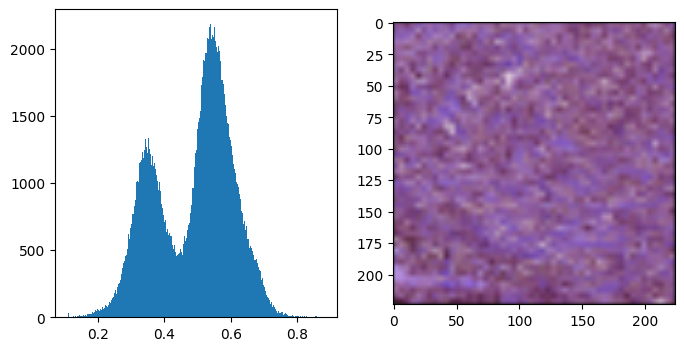

In [ ]:
def plot_histogram(a):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.hist(a.ravel(),bins=255)
    plt.subplot(1,2,2)
    plt.imshow(a,vmin=0,vmax=1)
    plt.show()

plot_histogram(X_train[5])

{0: 'benign', 1: 'malignant'}


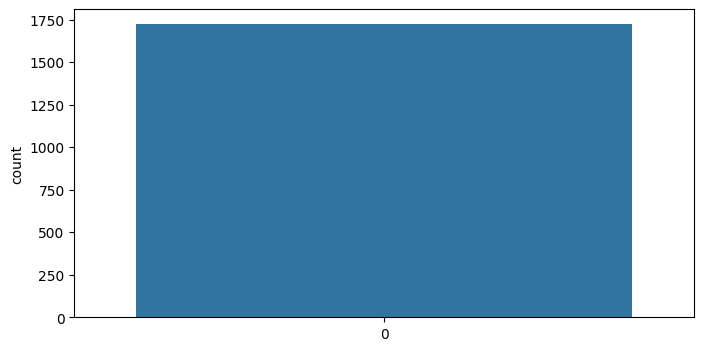

In [ ]:
plt.figure(figsize=(8,4))

map_characters = {0:"benign",1:"malignant"}
dict_characters = map_characters

df = pd.DataFrame()
df["labels"]=y_train
lab = df["labels"]
dist=lab.value_counts()
sns.countplot(lab)
print(dict_characters)

Generator Data

In [ ]:
generatordata = ImageDataGenerator(zoom_range = 0.2,height_shift_range = 0.1,
                                   width_shift_range = 0.2,rotation_range = 12)

In [ ]:
X_train = X_train/255
X_test = X_test/255

X_train_R= X_train.reshape(len(X_train),224,224,3)
X_test_R= X_test.reshape(len(X_test),224,224,3)
y_train = to_categorical(y_train, num_classes= 2)
y_test = to_categorical(y_test)

CNN Model

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),padding="same",activation="relu",kernel_initializer="glorot_uniform",input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(layers.Conv2D(64,(3,3),padding="same",activation="relu",kernel_initializer="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),padding="same",activation="relu",kernel_initializer="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu",kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(2,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0

In [ ]:
model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=32
epochs=100

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=5,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=1e-7)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=95,
    restore_best_weights=True
)

In [ ]:
history =  model.fit(generatordata.flow(X_train_R, y_train, batch_size=batch_size),epochs=epochs,
                              verbose=1,
                              validation_data =(X_test_R,y_test),callbacks=[learning_rate_reduction,custom_early_stopping])

ResNet50V2 Model

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [ ]:
input_shape = (224,224,3)
epochs = 25
batch_size = 2

In [ ]:
model = ResNet50V2(include_top=True,
                 weights= None,
                 input_tensor=None,
                 input_shape=input_shape,
                 pooling='max ',
                 classes=2)

model.compile(optimizer = "adam" ,
              loss = "binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_R, y_train, validation_split=0.2,
                    epochs= epochs, batch_size= batch_size, verbose=1,callbacks=[learning_rate_reduction,custom_early_stopping] )

Epoch 1/25
690/690 [==============================] - ETA: 0s - loss: 0.5856 - accuracy: 0.7215

690/690 [==============================] - 671s 972ms/step - loss: 0.5856 - accuracy: 0.7215 - val_loss: 0.3634 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 2/25
690/690 [==============================] - ETA: 0s - loss: 0.5387 - accuracy: 0.7534

690/690 [==============================] - 655s 950ms/step - loss: 0.5387 - accuracy: 0.7534 - val_loss: 0.2663 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 3/25
690/690 [==============================] - ETA: 0s - loss: 0.5202 - accuracy: 0.7614

690/690 [==============================] - 652s 945ms/step - loss: 0.5202 - accuracy: 0.7614 - val_loss: 0.1187 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 4/25
690/690 [==============================] - ETA: 0s - loss: 0.4796 - accuracy: 0.7832

690/690 [==============================] - 647s 938ms/step - loss: 0.4796 - accuracy: 0.7832 - val_loss: 0.8006 - val_accuracy: 0.5681 - lr: 0.0010
Epoch 5/25
690/690 [==============================] - ETA: 0s - loss: 0.4333 - accuracy: 0.8144

690/690 [==============================] - 640s 928ms/step - loss: 0.4333 - accuracy: 0.8144 - val_loss: 0.1021 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 6/25
690/690 [==============================] - ETA: 0s - loss: 0.3629 - accuracy: 0.8666

690/690 [==============================] - 651s 943ms/step - loss: 0.3629 - accuracy: 0.8666 - val_loss: 0.4942 - val_accuracy: 0.8493 - lr: 0.0010
Epoch 7/25
690/690 [==============================] - ETA: 0s - loss: 0.3542 - accuracy: 0.8629

690/690 [==============================] - 651s 943ms/step - loss: 0.3542 - accuracy: 0.8629 - val_loss: 0.1021 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 8/25
690/690 [==============================] - ETA: 0s - loss: 0.3317 - accuracy: 0.8695

690/690 [==============================] - 650s 943ms/step - loss: 0.3317 - accuracy: 0.8695 - val_loss: 0.4081 - val_accuracy: 0.8377 - lr: 0.0010
Epoch 9/25
690/690 [==============================] - ETA: 0s - loss: 0.3231 - accuracy: 0.8803

690/690 [==============================] - 648s 939ms/step - loss: 0.3231 - accuracy: 0.8803 - val_loss: 0.1924 - val_accuracy: 0.9565 - lr: 0.0010
Epoch 10/25
690/690 [==============================] - ETA: 0s - loss: 0.3029 - accuracy: 0.8891

690/690 [==============================] - 644s 933ms/step - loss: 0.3029 - accuracy: 0.8891 - val_loss: 0.3198 - val_accuracy: 0.9246 - lr: 0.0010
Epoch 11/25
690/690 [==============================] - ETA: 0s - loss: 0.2836 - accuracy: 0.8949

690/690 [==============================] - 651s 944ms/step - loss: 0.2836 - accuracy: 0.8949 - val_loss: 0.3453 - val_accuracy: 0.9072 - lr: 0.0010
Epoch 12/25
690/690 [==============================] - ETA: 0s - loss: 0.3008 - accuracy: 0.8883

690/690 [==============================] - 650s 942ms/step - loss: 0.3008 - accuracy: 0.8883 - val_loss: 0.0937 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 13/25
690/690 [==============================] - ETA: 0s - loss: 0.2915 - accuracy: 0.8970

690/690 [==============================] - 654s 947ms/step - loss: 0.2915 - accuracy: 0.8970 - val_loss: 0.8900 - val_accuracy: 0.5942 - lr: 0.0010
Epoch 14/25
690/690 [==============================] - ETA: 0s - loss: 0.2930 - accuracy: 0.8883

690/690 [==============================] - 649s 941ms/step - loss: 0.2930 - accuracy: 0.8883 - val_loss: 0.1491 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 15/25
690/690 [==============================] - ETA: 0s - loss: 0.2826 - accuracy: 0.8999

690/690 [==============================] - 651s 944ms/step - loss: 0.2826 - accuracy: 0.8999 - val_loss: 0.1235 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 16/25
690/690 [==============================] - ETA: 0s - loss: 0.2703 - accuracy: 0.9072

690/690 [==============================] - 652s 946ms/step - loss: 0.2703 - accuracy: 0.9072 - val_loss: 0.1971 - val_accuracy: 0.9594 - lr: 0.0010
Epoch 17/25
690/690 [==============================] - ETA: 0s - loss: 0.2714 - accuracy: 0.8956

690/690 [==============================] - 649s 940ms/step - loss: 0.2714 - accuracy: 0.8956 - val_loss: 0.2265 - val_accuracy: 0.9478 - lr: 0.0010
Epoch 18/25
690/690 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.9036

690/690 [==============================] - 650s 942ms/step - loss: 0.2693 - accuracy: 0.9036 - val_loss: 1.8465 - val_accuracy: 0.4957 - lr: 0.0010
Epoch 19/25
690/690 [==============================] - ETA: 0s - loss: 0.2775 - accuracy: 0.8963

690/690 [==============================] - 651s 943ms/step - loss: 0.2775 - accuracy: 0.8963 - val_loss: 0.8543 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 20/25
690/690 [==============================] - ETA: 0s - loss: 0.2671 - accuracy: 0.9007

690/690 [==============================] - 650s 942ms/step - loss: 0.2671 - accuracy: 0.9007 - val_loss: 0.3457 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 21/25
690/690 [==============================] - ETA: 0s - loss: 0.2523 - accuracy: 0.9057

690/690 [==============================] - 653s 946ms/step - loss: 0.2523 - accuracy: 0.9057 - val_loss: 0.0934 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 22/25
690/690 [==============================] - ETA: 0s - loss: 0.2526 - accuracy: 0.9123

690/690 [==============================] - 650s 942ms/step - loss: 0.2526 - accuracy: 0.9123 - val_loss: 0.2550 - val_accuracy: 0.9188 - lr: 0.0010
Epoch 23/25
690/690 [==============================] - ETA: 0s - loss: 0.2528 - accuracy: 0.9057

690/690 [==============================] - 653s 946ms/step - loss: 0.2528 - accuracy: 0.9057 - val_loss: 0.6980 - val_accuracy: 0.7275 - lr: 0.0010
Epoch 24/25
690/690 [==============================] - ETA: 0s - loss: 0.2460 - accuracy: 0.9173

690/690 [==============================] - 650s 942ms/step - loss: 0.2460 - accuracy: 0.9173 - val_loss: 0.1644 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 25/25
690/690 [==============================] - ETA: 0s - loss: 0.2463 - accuracy: 0.9159

690/690 [==============================] - 649s 941ms/step - loss: 0.2463 - accuracy: 0.9159 - val_loss: 0.2846 - val_accuracy: 0.8957 - lr: 0.0010


In [ ]:
score = model.evaluate(X_test_R, y_test, batch_size=batch_size, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Vgg16  Model

In [ ]:
from tensorflow.keras.applications import vgg16

In [ ]:
def create_vgg16():
  model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(224,224,3), pooling="max", classes=2)

  return model


In [ ]:
vgg16_model = create_vgg16()
vgg16_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
vgg16 = vgg16_model.fit(x=X_train_R,
                        y=y_train, batch_size=2,
                        epochs=25, verbose=1,
                        validation_data=(X_test_R, y_test), shuffle=True,callbacks=[learning_rate_reduction,custom_early_stopping])